In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [126]:
#importing the dataset
#dataset link : "https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction"
df = pd.read_csv("Housing.csv")

In [127]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [128]:
df.shape

(545, 13)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [130]:
numerical_cols = df.select_dtypes(include=np.number)
stats = numerical_cols.describe().T
stats['Median'] = numerical_cols.median()
stats['Skewness'] = numerical_cols.skew()
stats

,count,mean,std,min,25%,50%,75%,max,Median,Skewness
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,4340000.0,1.212239
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0,4600.0,1.321188
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0,3.0,0.495684
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0,1.0,1.589264
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0,2.0,1.082088
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0,0.0,0.842062


In [131]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [132]:
for col in numerical_cols.columns:
  fig = px.box(df,x=col,title=f"Boxplot of {col}")
  fig.show()

In [133]:
#Trying to observe abnormal values of price
price_outlliers = df[df['price']>9100000]
price_outlliers.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


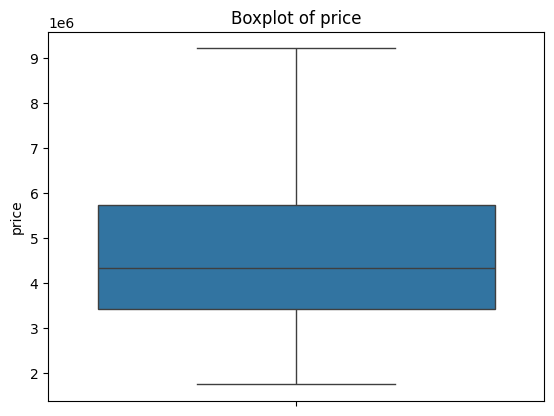

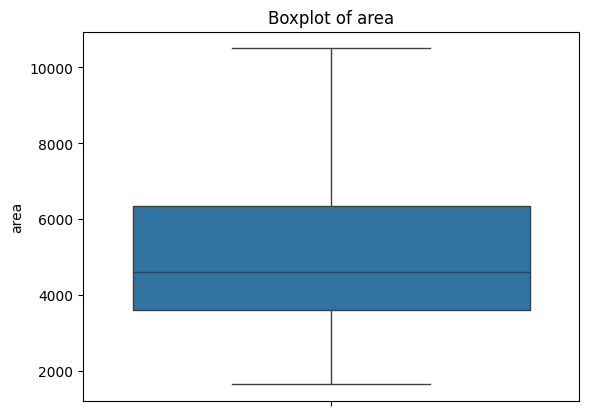

In [134]:
#Handling outliers of 'price' and 'area'
outlier = ['price','area']
for col in outlier:
  Q1,Q3 = np.percentile(df[col],[25,75])
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df[col] = np.where(df[col]<lower_bound,lower_bound,df[col])
  df[col] = np.where(df[col]>upper_bound,upper_bound,df[col])
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [135]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9205000.0,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9205000.0,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9205000.0,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,9205000.0,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [136]:
#Encoding the cateforical variabales
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['mainroad'] = label.fit_transform(df['mainroad'])
df['guestroom'] = label.fit_transform(df['guestroom'])
df['basement'] = label.fit_transform(df['basement'])
df['hotwaterheating'] = label.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label.fit_transform(df['airconditioning'])
df['prefarea'] = label.fit_transform(df['prefarea'])
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,1,2
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0,2
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,1,2
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0,2


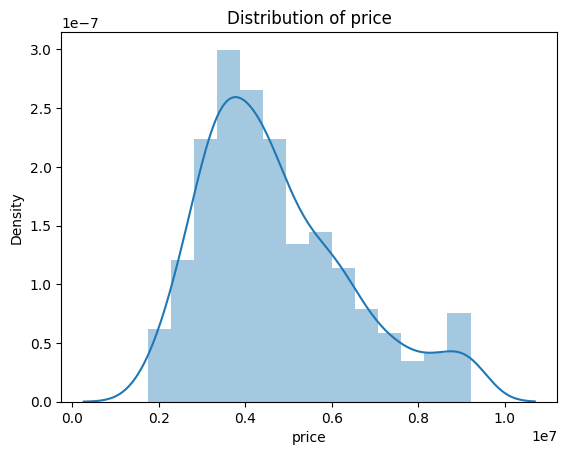

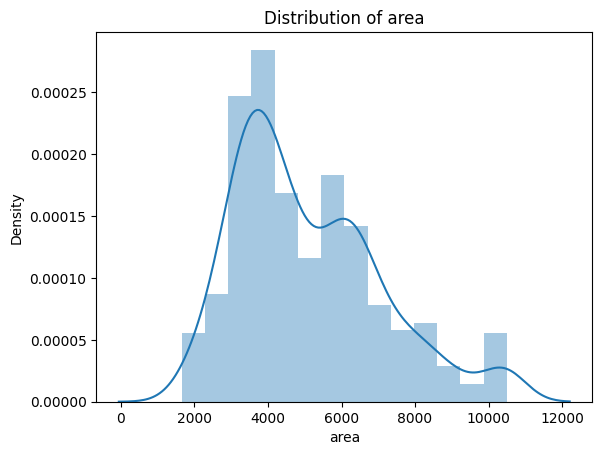

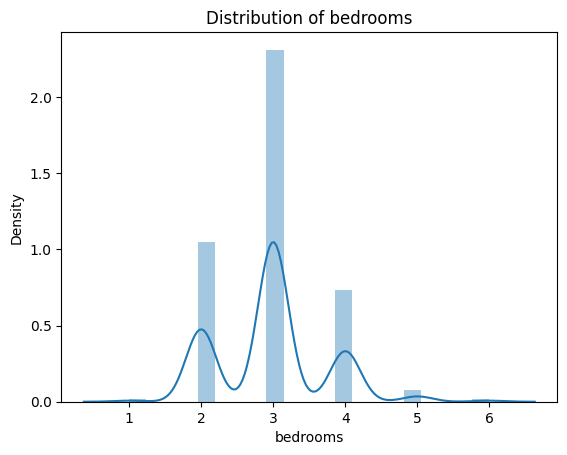

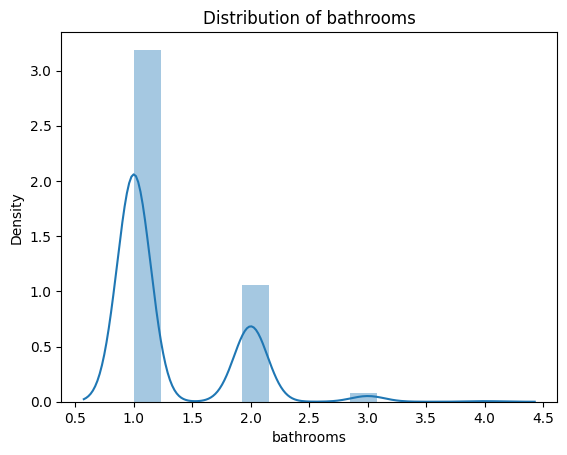

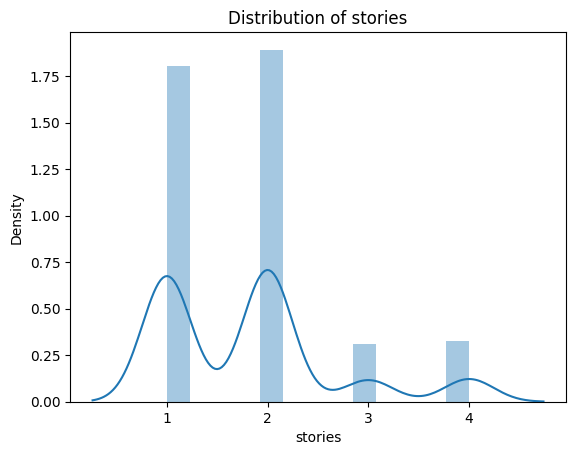

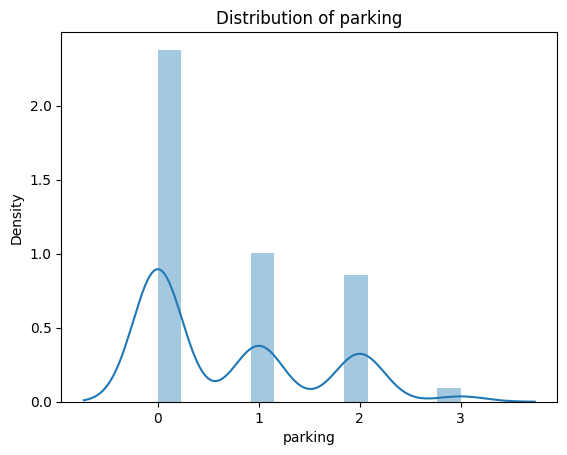

In [137]:
for col in numerical_cols.columns:
  sns.distplot(df[col])
  plt.title(f"Distribution of {col}")
  plt.show()

In [138]:
#Performing feature scaling but before that handling skweness of the features
continuous_features = ['price','area']
#Checking for skewness of both features
for col in continuous_features:
  print(f"{col} : {df[col].skew()}")

price : 0.8066723525077296
area : 0.8075109597834306


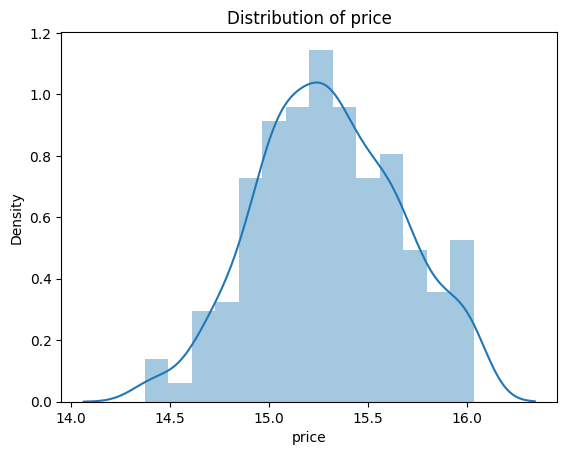

After log transformation, price : 0.010439761119667393


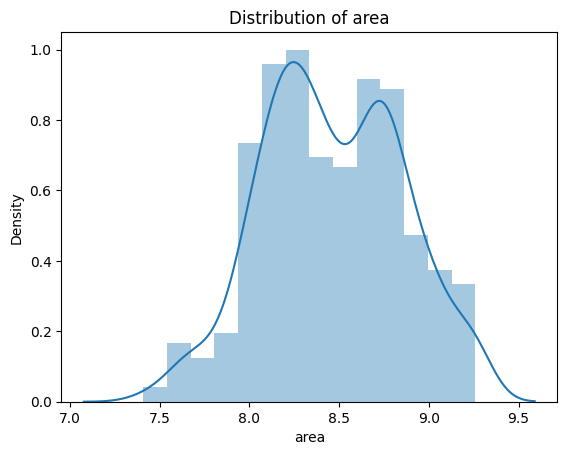

After log transformation, area : -0.0038915046151493087


In [139]:
# Applying log transformation on price and area as both of them are right skewed

df['price'] = np.log(df['price'])
df['area'] = np.log(df['area'])

for col in continuous_features:
  sns.distplot(df[col])
  plt.title(f"Distribution of {col}")
  plt.show()
  print(f"After log transformation, {col} : {df[col].skew()}")

In [140]:
#discrete_cols are the columns that are right skewed and are discrete in nature
#Using binning method for these methods
df['bedrooms'] = pd.cut(df['bedrooms'], [0, 2, 4, 6, np.inf], labels=['Small', 'Medium', 'Large', 'Very Large'])
df['bathrooms'] = pd.cut(df['bathrooms'], [0, 1, 2, 3, np.inf], labels=['Basic', 'Standard', 'Good', 'Luxury'])
df['parking'] = pd.cut(df['parking'], [-1, 0, 1, 2, np.inf], labels=['No Parking', 'Single', 'Double', 'Multi'])
df['stories'] = pd.cut(df['stories'], [0, 1, 2, 3, np.inf], labels=['Single', 'Double', 'Triple', 'Multi'])

In [141]:
#After binning encoding these features using Map function

df['bedrooms'] = df['bedrooms'].map({'Small': 1, 'Medium': 2, 'Large': 3, 'Very Large': 4})
df['bathrooms'] = df['bathrooms'].map({'Basic': 1, 'Standard': 2, 'Good': 3, 'Luxury': 4})
df['parking'] = df['parking'].map({'No Parking': 0, 'Single': 1, 'Double':2, 'Multi': 3})
df['stories'] = df['stories'].map({'Single': 1, 'Double': 2, 'Triple': 3, 'Multi': 4})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.035257,8.911934,2,2,3,1,0,0,0,1,2,1,2
1,16.035257,9.100526,2,4,4,1,0,0,0,1,3,0,2
2,16.035257,9.206332,2,2,2,1,0,1,0,0,2,1,1
3,16.035257,8.922658,2,2,2,1,0,1,0,1,3,1,2
4,16.035257,8.911934,2,1,2,1,1,1,0,1,2,0,2


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [143]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [146]:
y_pred = linear.predict(X_test_scaled)

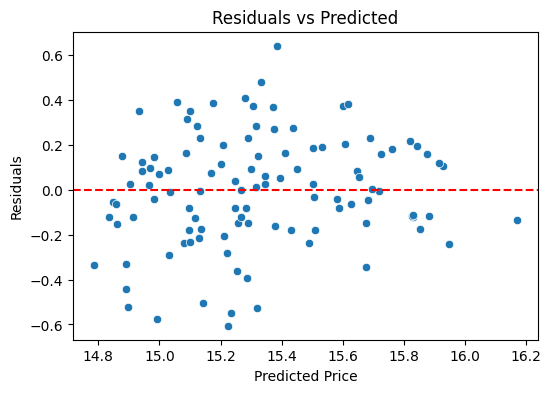

In [151]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

Since the points are randomly distributed, we can say that model is performing well.

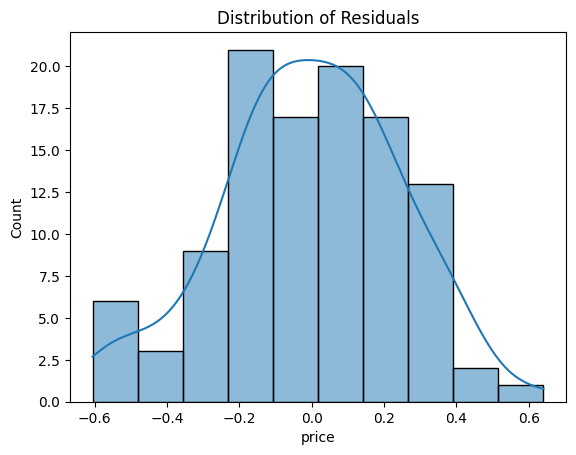

In [152]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

In [147]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

MAE: 0.20
MSE: 0.06
R2 Score: 0.66


In [148]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

             Feature  Coefficient
0               area     0.116406
2          bathrooms     0.085168
3            stories     0.066878
8    airconditioning     0.063154
10          prefarea     0.054054
6           basement     0.047780
11  furnishingstatus     0.044773
4           mainroad     0.031574
7    hotwaterheating     0.029819
9            parking     0.024840
1           bedrooms     0.021693
5          guestroom     0.014880


The coefficients above reflect the impact per standard deviation unit, not original scale, more the coefficient more the positive impact on the target feature.

Plotting regression line for each feature individually considering other features to be constant.

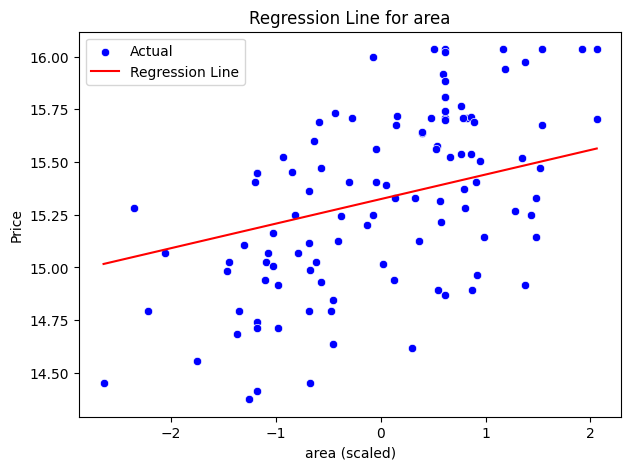

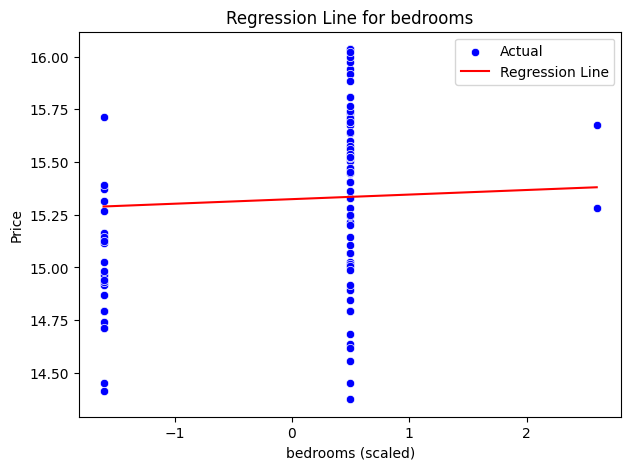

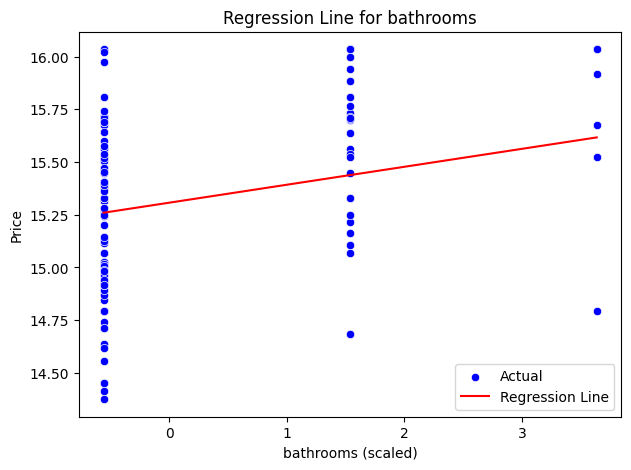

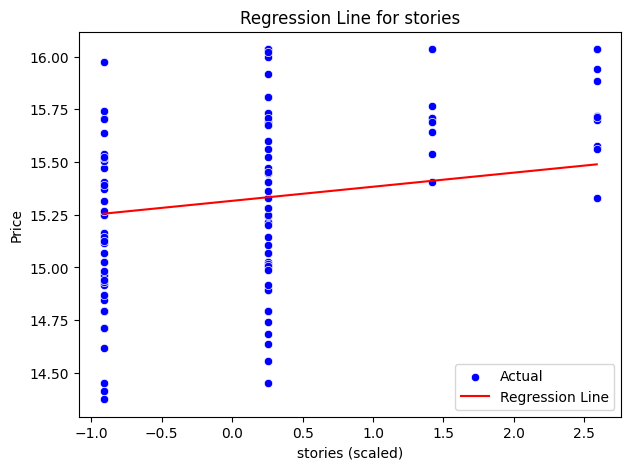

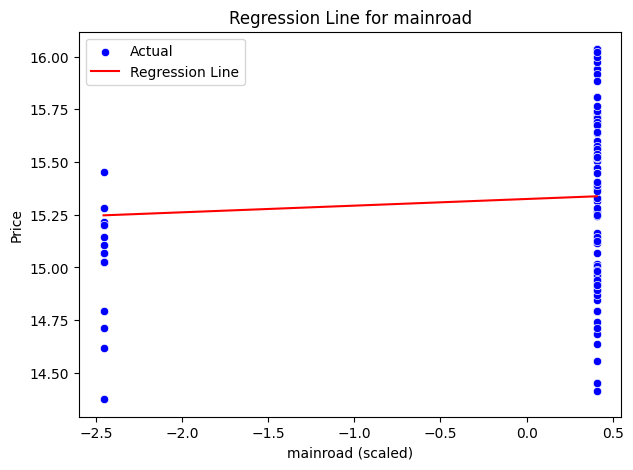

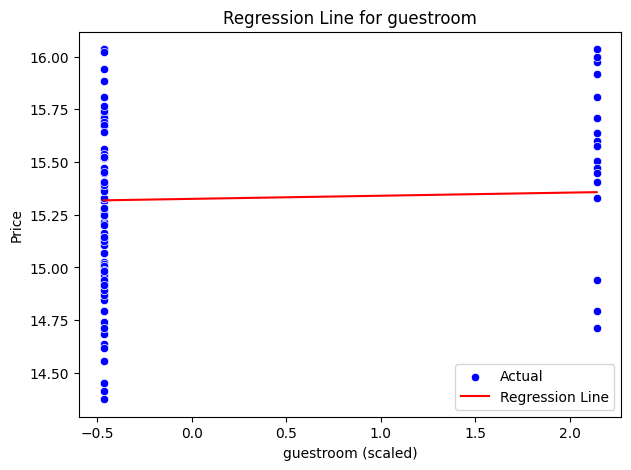

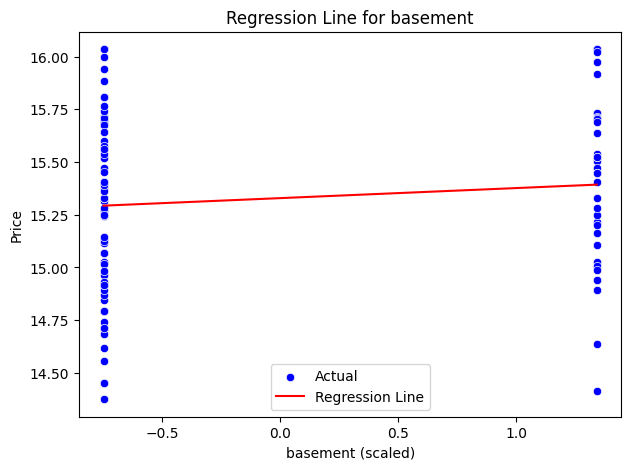

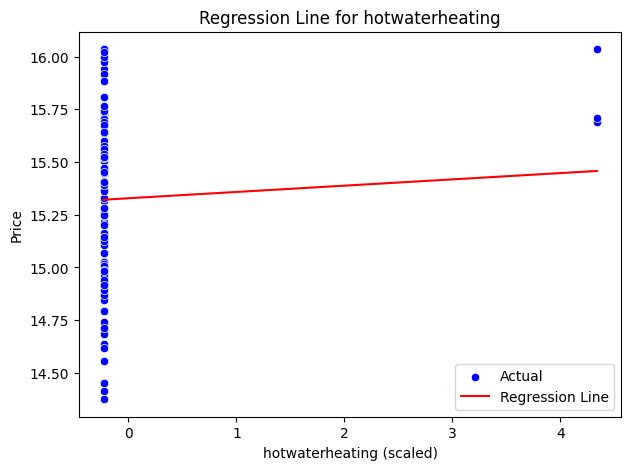

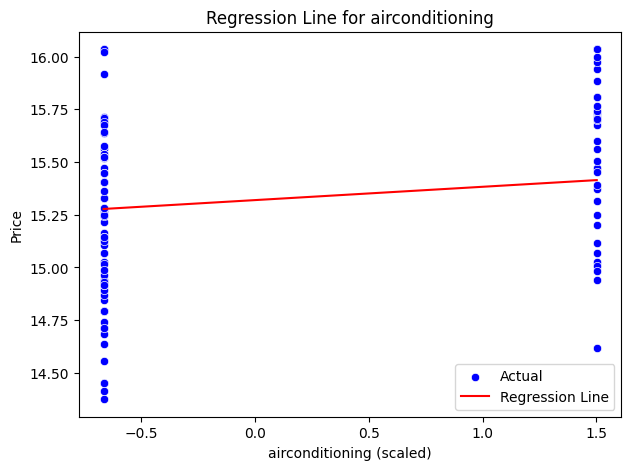

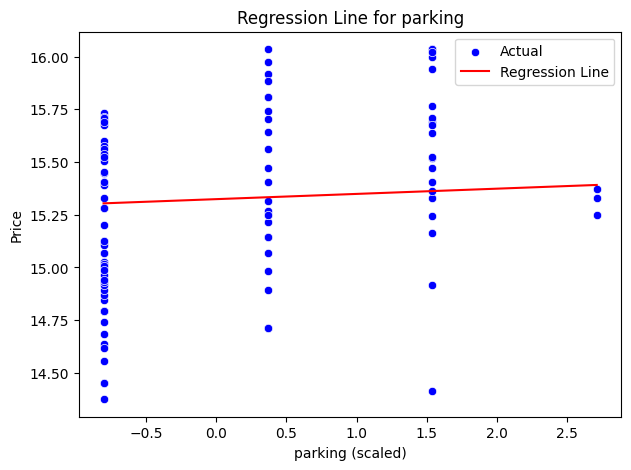

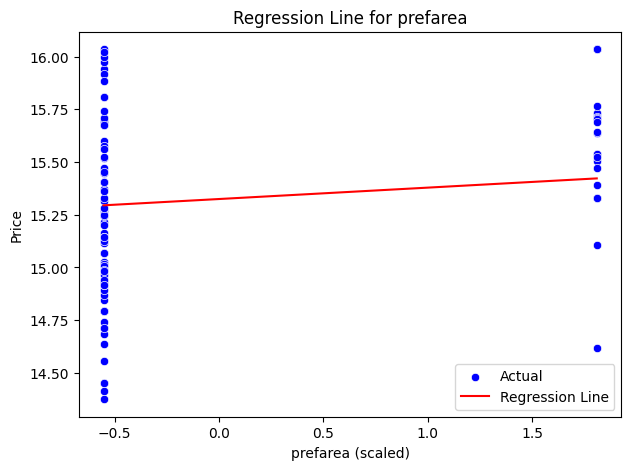

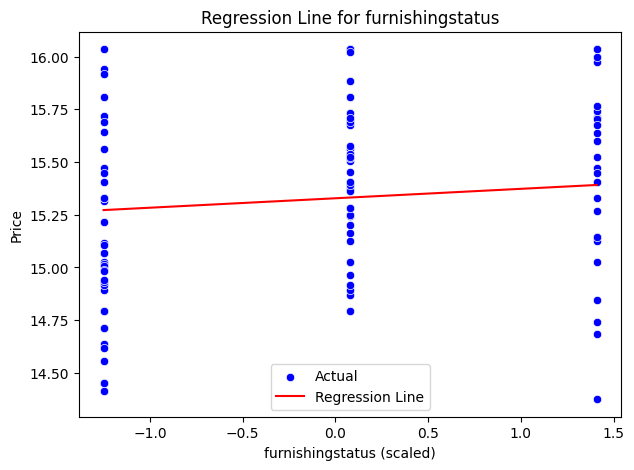

In [156]:
feature_names = list(X.columns)

for feature in feature_names:
    feature_index = feature_names.index(feature)

    # Generate range for selected feature
    feature_values = np.linspace(X_test_scaled[:, feature_index].min(),
                                 X_test_scaled[:, feature_index].max(), 100)

    # Hold other features constant (mean)
    mean_features = X_test_scaled.mean(axis=0)
    X_plot = np.tile(mean_features, (100, 1))
    X_plot[:, feature_index] = feature_values

    # Predict
    y_plot = linear.predict(X_plot)

    # Scatter plot actual values
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=X_test_scaled[:, feature_index], y=y_test, color='blue', label='Actual')

    # Regression line
    plt.plot(feature_values, y_plot, color='red', label='Regression Line')

    plt.xlabel(f'{feature} (scaled)')
    plt.ylabel('Price')
    plt.title(f'Regression Line for {feature}')
    plt.legend()
    plt.show()


In [159]:
df.to_csv('Cleaned_Housing.csv', index=False)